In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
Url = 'https://raw.githubusercontent.com/IT22106360/QuantaML-FDM-Employee-Retention/refs/heads/main/artifacts/preprocessed_dataset.csv'
imbl_dataset = pd.read_csv(Url, encoding='latin-1')
imbl_dataset

,city_development_index,relevent_experience,education_level,experience,last_new_job,target
0,0.920,1,2.0,0.0,1.000000,1
1,0.776,0,2.0,0.0,5.000000,0
2,0.624,0,2.0,0.0,0.000000,0
3,0.789,0,2.0,0.0,0.000000,1
4,0.767,1,2.0,0.0,4.000000,0
...,...,...,...,...,...,...
1521,0.924,0,2.0,0.0,2.188263,0
1522,0.926,0,2.0,3.0,2.188263,0
1523,0.682,0,2.0,6.0,2.188263,0
1524,0.624,1,2.0,4.0,2.188263,0


In [5]:
X = imbl_dataset.drop('target', axis=1)  # Features
y = imbl_dataset['target']  # target variable

In [6]:
X.shape
y.shape

(1526,)

In [7]:
y.value_counts()

target
0    915
1    611
Name: count, dtype: int64

Class imbalance handling
-------------------------

In [8]:
from imblearn.over_sampling import SMOTE

In [9]:
smote = SMOTE(sampling_strategy='minority')

# fit the object to our training data
X, y = smote.fit_resample(imbl_dataset.loc[:,imbl_dataset.columns!='target'], imbl_dataset['target'])
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (1830, 5)
Shape of y: (1830,)


In [20]:
print(X.duplicated().sum())

495


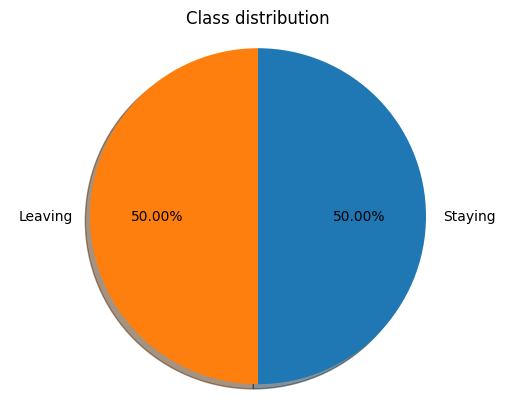

# samples associated with not leaving: 915
# samples associated with leaving: 915


In [11]:
_, class_counts = np.unique(y, return_counts=True)
classes = ['Staying', 'Leaving']
fig, ax = plt.subplots()
ax.pie(class_counts, labels=classes, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with not leaving: {}".format(class_counts[0]))
print("# samples associated with leaving: {}".format(class_counts[1]))

Modeling

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def modeler(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

    scaler = StandardScaler()
    x_train =scaler.fit_transform(x_train)
    x_test =scaler.transform(x_test)

    # model training
    model.fit(x_train, y_train)


    y_pred=model.predict(x_test)


        # metrics calculation
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,
             'auc':auc }


Decision Tree Classifier

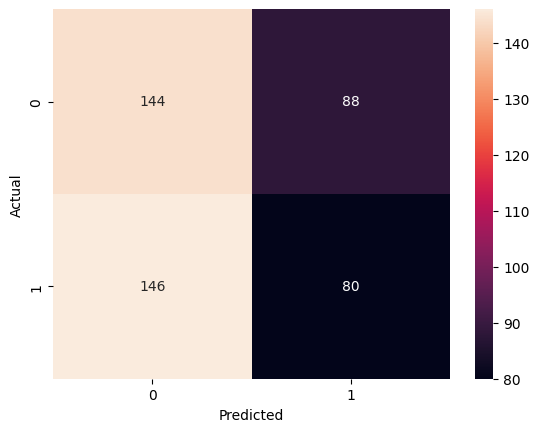

Accuracy: 0.4890829694323144
Precision: 0.47619047619047616
Recall: 0.35398230088495575
F1 Score: 0.40609137055837563
Area Under Curve: 0.48733597802868484


In [13]:
#Rashmika
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini'
                            , max_depth=10
                            , max_features='sqrt'
                            , min_samples_leaf= 1
                            , min_samples_split=2)
DT_Test = modeler(DT, X, y)

print('Accuracy:',DT_Test['acc'])
print('Precision:', DT_Test['prec'])
print('Recall:', DT_Test['rec'])
print('F1 Score:', DT_Test['f1'])
print('Area Under Curve:', DT_Test['auc'])

Random Forrest Classifier

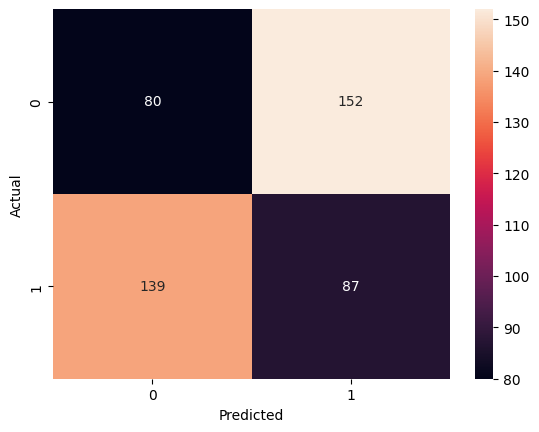

Accuracy: 0.3646288209606987
Precision: 0.36401673640167365
Recall: 0.38495575221238937
F1 Score: 0.3741935483870968
Area Under Curve: 0.364891669209643


In [14]:
#Sakuni

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

RF_Test = modeler(RF, X, y)

print('Accuracy:',RF_Test['acc'])
print('Precision:', RF_Test['prec'])
print('Recall:', RF_Test['rec'])
print('F1 Score:', RF_Test['f1'])
print('Area Under Curve:', RF_Test['auc'])

Gaussian Naive Bayse

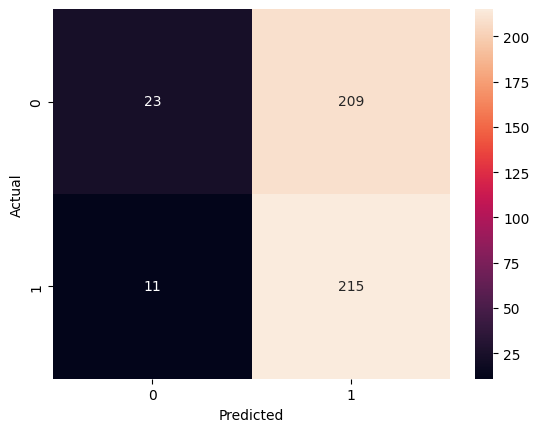

Accuracy: 0.519650655021834
Precision: 0.5070754716981132
Recall: 0.9513274336283186
F1 Score: 0.6615384615384615
Area Under Curve: 0.5252326823314006


In [15]:
#Tehan

from sklearn.naive_bayes import GaussianNB
NB =GaussianNB()

NB_Test= modeler(NB, X, y)

print('Accuracy:',NB_Test['acc'])
print('Precision:', NB_Test['prec'])
print('Recall:', NB_Test['rec'])
print('F1 Score:', NB_Test['f1'])
print('Area Under Curve:', NB_Test['auc'])


Support Vector Machine

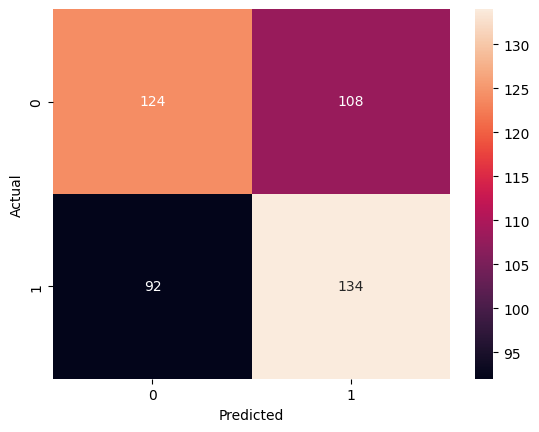

Accuracy: 0.5633187772925764
Precision: 0.5537190082644629
Recall: 0.5929203539823009
F1 Score: 0.5726495726495726
Area Under Curve: 0.5637015563014953


In [16]:
#Wadda

from sklearn.svm import SVC
SVM = SVC(kernel="rbf",C=1,probability=True)


SVM_Test = modeler(SVM , X, y)

print('Accuracy:',SVM_Test['acc'])
print('Precision:', SVM_Test['prec'])
print('Recall:', SVM_Test['rec'])
print('F1 Score:', SVM_Test['f1'])
print('Area Under Curve:', SVM_Test['auc'])

Logistic Regression

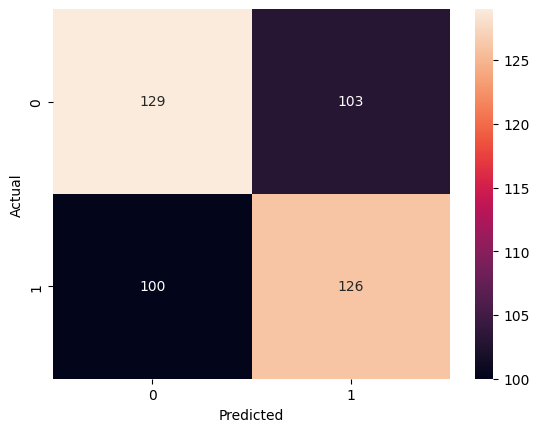

Accuracy: 0.5567685589519651
Precision: 0.5502183406113537
Recall: 0.5575221238938053
F1 Score: 0.5538461538461539
Area Under Curve: 0.556778303326213


In [17]:
#Vishva

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()


LR_Test = modeler(LR, X, y)

print('Accuracy:',LR_Test['acc'])
print('Precision:', LR_Test['prec'])
print('Recall:', LR_Test['rec'])
print('F1 Score:', LR_Test['f1'])
print('Area Under Curve:', LR_Test['auc'])

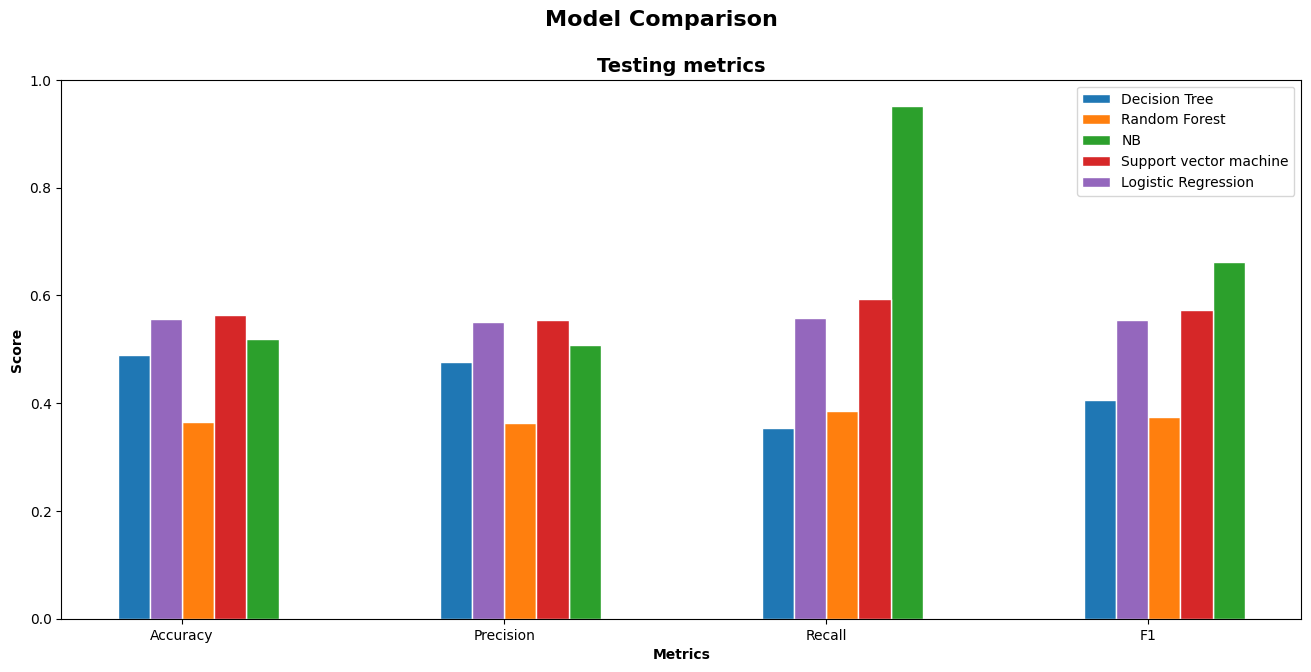

In [18]:
# Intitialize figure with two plots
fig, (ax1) = plt.subplots(1)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(16)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.1
dt_score = [DT_Test['acc'], DT_Test['prec'], DT_Test['rec'], DT_Test['f1']]
rf_score = [RF_Test['acc'], RF_Test['prec'], RF_Test['rec'], RF_Test['f1']]
nb_score  = [NB_Test['acc'], NB_Test['prec'], NB_Test['rec'], NB_Test['f1']]
svm_score = [SVM_Test['acc'], SVM_Test['prec'], SVM_Test['rec'], SVM_Test['f1']]
lr_score = [LR_Test['acc'], LR_Test['prec'], LR_Test['rec'], LR_Test['f1']]

## Set position of bar on x axis
r1 = np.arange(len(dt_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5  =[x + barWidth for x in r4]


## Make the plot
ax1.bar(r1, dt_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r3, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r5, nb_score, width=barWidth, edgecolor='white', label='NB')
ax1.bar(r4, svm_score, width=barWidth, edgecolor='white', label='Support vector machine')
ax1.bar(r2, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dt_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Testing metrics', fontsize=14, fontweight='bold')
ax1.legend()
